In [1]:

#When working with files, it is always a good idea to import os, which allows you to be computer-agnostic
import os

#To create basic animations (by repeatedly changing a figure), these internal subroutines of iPython must be imported
from IPython.display import clear_output, display

#Any type of plot that involves matrices will end up needing NumPy
import numpy as np
#Import the plotting libraries of Matplotlib (the most commonly used routines)
import matplotlib.pyplot as plt

In [2]:
psi = np.linspace(0,-20,100)
theta_s_list = [0.26, 0.37, 0.47, 0.32]
theta_r_list = [0.01, 0.05, 0.16, 0.05]
alpha_list = [0.0324, 0.0161, 0.0066, 0.0630]
n_list = [6.6600, 2.6632, 1.8601, 4.4545]
L = 0.5

plot_marks = ['b-','r-','g-','k-']
names = ['sand','loam','clay','lab sand']

num_curves = np.size(theta_s_list,0)


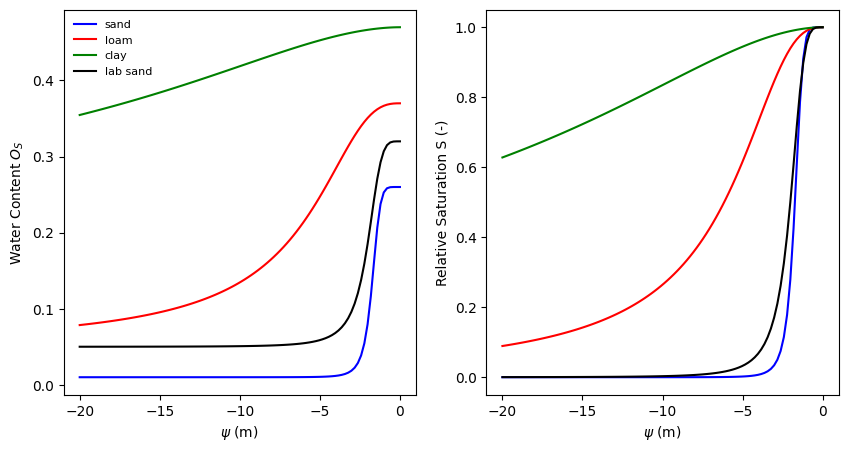

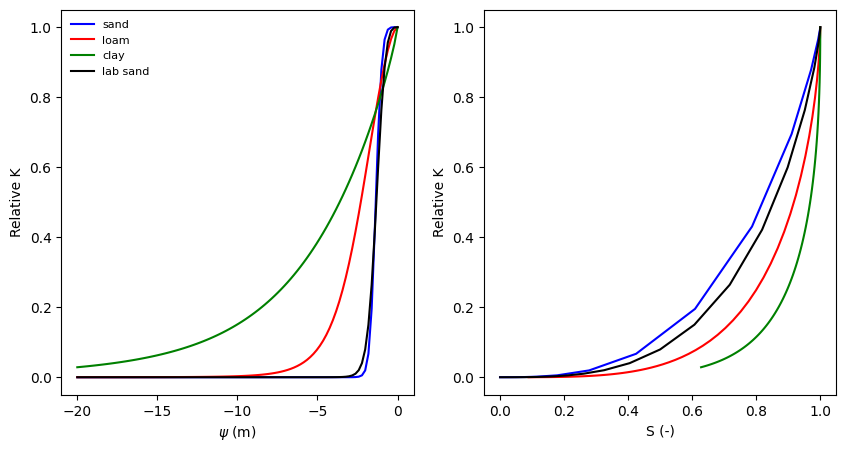

In [3]:
#Create a figure, specifying the size at time of creation
fig, axes = plt.subplots(1,2,figsize=(10,5), dpi=100)

for i in range(num_curves):
    theta_r, theta_s, alpha, n = theta_r_list[i], theta_s_list[i], alpha_list[i], n_list[i]
    m = 1-1/n
    theta_w = theta_r + (theta_s - theta_r)/(1+alpha*(-psi)**n)**m 
    S = (1/(1+alpha*(-psi)**n))**m

    axes[0].plot(psi, theta_w, plot_marks[i],label=names[i])
    axes[0].set_ylabel('Water Content $O_S$')
    axes[1].plot(psi,S, plot_marks[i],label=names[i])
    axes[1].set_ylabel('Relative Saturation S (-)')    
    axes[0].legend(fontsize=8,frameon=False)
    for p in range(2):
        axes[p].set_xlabel('$\psi$ (m)')

fig, axes = plt.subplots(1,2,figsize=(10,5), dpi=100)

for i in range(num_curves):
    theta_r, theta_s, alpha, n = theta_r_list[i], theta_s_list[i], alpha_list[i], n_list[i]
    m = 1-1/n
    S = (1/(1+alpha*(-psi)**n))**m
    K_rel = S**L*(1-(1-S**(1/m))**(m))**2

    axes[0].plot(psi,K_rel, plot_marks[i],label=names[i])
    axes[0].set_xlabel('$\psi$ (m)')
    axes[0].set_ylabel('Relative K')
    axes[0].legend(fontsize=8,frameon=False)
    axes[1].plot(S,K_rel, plot_marks[i],label=names[i])
    axes[1].set_xlabel('S (-)')
    axes[1].set_ylabel('Relative K')



output_name = os.path.join('.','nboutput','VG_curves.png')
fig.savefig(output_name)